# Q3. Project Proposal - Just Eat It!

## Description

A personalized allergy index travel advisory app (risk management tool).

## Motivation

EATING is one of the keys to experiencing, accessing and understanding another culture which brings both joy and sustenance. However, as a parent of a boy with food allergies we know first-hand the perils of eating without a careful risk assessment; and sometimes even with one - thankfully he was OK!

During the Fellowship I plan to:
* build and deliver an app which can be deployed on my son's and millions of others smart devices in which they specify their allergy profile and tolerance, and receive customised suggestions to assist them make a risk-informed decision about the countries, cuisines and recipes that are most likely to be suitable for them as is or with minimal modification so they can truly experience, access and understand other cultures (via food) inconjunction with their family and not from the special-case sidelines.
* greatly enhance and expand upon the representative (prototype) version of the Yummly.com recipe/cuisine dataset that is available as a Kaggle warm-up exercise. i.e. I need a high quality, large, well-classified and contemporary data set that I believe Yummly.com can provide;
* explore the data to fully understand the questions that can be asked and answered in an allergy-context;
* conduct some more sophisticated analysis using ML, NLP techniques (e.g. possibly multiple correspondence analysis (MCA) to understand the underlying structure of recipes.


## Data Source

#### Link to public description of data source. 

Prototype dataset: [https://www.kaggle.com/c/whats-cooking/data] extract from Yummly.com

The prototype Kaggle dataset is provided as a compressed JSON file (12,415,067 bytes / 12.MB) which was imported in Python using Pandas `read_json()` method. I also applied for Hackathon-style access to the Yummly API https://developer.yummly.com and was granted access shortly before the submission deadline. There is an open-source Python wrapper to the Yummly API which I attempted to use, however, it appears to have a bug which needs to be fixed - but in principle I have access to retreive data directly from Yummly. From a quick survey of their documentation, it appears there is a much richer dataset that can be accessed compared to the subset provided to Kaggle.


## Analysis approach


## Introductory EDA

My initial Exploratory Data Analysis is presented below following the **Introductory EDA - Jupyter Notebook** heading.

The sample allergy profile was defined to be:
`allergy_profile = ['butter', 'milk', 'peanuts', 'pecan', 'nuts', 'fish']`

## Initial Results & Observations

#### First Plot - Towards a creating a personalized allergy index. 

[https://github.com/Mjboothaus/tdi/blob/master/Figure1_MJB.png]

Figure 1: [LEFT] Shows a count of all recipes in the dataset by country containing  none of the allergens in the personsal allergy profile (blue bars), compared to those which contain 1 or more of the allergens (green bars). [RIGHT] A count of all recipes in the dataset by country containing no more than 1 of the allergens in the personsal allergy profile (blue bars), compared to those containing two or more of the allergens in the personsal allergy profile. Clearly relaxing the number of allergens to be considered in the profile by one clearly can bring a lot of recipes "back on to the table". Looking at, for example, the ratios of such value counts is a crude first step towards constructing an allergy "index" for a particular cuisine/country.
Note: the sum of each pair of blue and green bars will be equal between the two panels.

#### Second Plot - Examining data quality.

[https://github.com/Mjboothaus/tdi/blob/master/Figure2_MJB.png]

Figure 2:  This plot shows the distribution of the number of ingredients in each recipe. Note the plot is truncated at 30 ingredients given the long right tail of the distribution. There is some curious step-like structure in the distribution at 5, 10, 15 and 20 ingredients. Perhaps the best recipes have a number of ingredients that are "divisible by 5"! However, the plot demonstrates that there are a number of recipes around (0.5%) that have more than 25 ingredients, with a few (3) having over 50 ingredients. Based on my initial research I believe this is a data issue and not some exotic recipe! As with any project, the quality of the outcomes are at best as good as the data inputs. So part of this project will be to work with the data directly via the Yummly API and to create some thorough quality metrics before going too far into more detailed analysis.


## Next Steps - During the Fellowship

The intial project scope is both achieveable within the time-frame and I believe it is also possible to make significant progress on:
1. Making it extensible to a variety of dietary profiles not just allergies: whether intolerances, observances, convictions, illnesses, weight-management or self-impositions;
2. Increasing the scale of the data set using the Yummly API and potentially other datasources e.g. with calorific information (https://developer.calorieking.com/food-api/);
3. Refining the granularity, which is initially subject to available categorizations, for exaple from country to region and from cuisine to sub-cuisine.
4. Expand to look at additional recipes categories e.g. entree, main, dessert, garnishes, sauces and beverages
5. Consider the implications for cross-contamination in meal (recipe) preparation.
6. MCA On ingredient lists https://pypi.python.org/pypi/mca (Categorical "Principal component analysis")



## Video Presentation

_Record a video of yourself giving a high-level proposal of your project to a **non-technical person**. The video should be no longer than 1 minute and should be at a **higher level than the previous explanation**._

_Record a video of yourself and upload it to YouTube (and not another video hosting service). **Be sure to make the video unlisted (but not private!)** so people without the link cannot find it on Google (go here, click "Edit" on your video, select unlisted from the privacy dropdown menu, and save your changes). You can use either your webcam or a smartphone._

####  EMBED Video URL

https://www.youtube.com/embed/y9tX5whl2U


### Acknowledgements

Thanks to my supportive family!

Background video music: "Weird Al" Yankovic - "Eat It"  https://itunes.apple.com/au/artist/weird-al-yankovic/id1855044

### Related Work

I noticed the following related research as part of my data discovery.

https://cseweb.ucsd.edu/~jmcauley/cse255/reports/fa15/039.pdf

---

## Introductory EDA - Jupyter Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":20})   

### The Concrete Motivation

![Allergic boy!](./IMG_0951.JPG "ShowMyImage")

### Prototype Kaggle Data Set

This JSON-formatted dataset contains the recipe id, type of cuisine and list of ingredients for each recipe (which is a list of variable length).

In [2]:
data_source_URL = 'https://www.kaggle.com/c/whats-cooking/data'

data_file = 'Kaggle_WhatsCooking_train.json'       # Named train.json on Kaggle site

In [3]:
!ls *.json

Kaggle_WhatsCooking_train.json


In [4]:
recipes = pd.read_json('Kaggle_WhatsCooking_train.json')

In [5]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
recipes.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [7]:
recipes.cuisine.nunique()

20

In [8]:
ingredients = recipes.ingredients.apply(pd.Series).stack().value_counts()

In [9]:
len(ingredients)

6714

In [10]:
allergy_profile = ['butter', 'milk', 'peanuts', 'pecan', 'nuts', 'fish']

# Examples of addition dietary profiles

vegan_profile = ['beef', 'chicken', 'pork', 'etc...']

muslim_profile = ['pork', 'halal', 'etc...']
 
vegetarian = []

paleo = []

intolerant = []

medical = []

personal_pref = []


# Check on text matching - is it partial of whole word (would think whole word)

In [11]:
ingredients[allergy_profile] / len(ingredients)

butter     0.722073
milk       0.337057
peanuts    0.060471
pecan           NaN
nuts       0.005213
fish       0.013554
dtype: float64

In [12]:
recipes.head(5)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [13]:
# Find all recipes that DON'T contain allergens and then group by cuisine

In [14]:
recipes.ingredients[1]

['plain flour',
 'ground pepper',
 'salt',
 'tomatoes',
 'ground black pepper',
 'thyme',
 'eggs',
 'green tomatoes',
 'yellow corn meal',
 'milk',
 'vegetable oil']

In [15]:
def allergens_in_ingredients(allergens, ingredients, n_allergens):
    inter = set(allergens).intersection(set(ingredients))
    if len(inter) > n_allergens:
        return 1
    else:
        return 0

In [16]:
allergens_in_ingredients(allergy_profile, recipes.ingredients[1], 1)

0

In [17]:
recipes.ingredients[1]

['plain flour',
 'ground pepper',
 'salt',
 'tomatoes',
 'ground black pepper',
 'thyme',
 'eggs',
 'green tomatoes',
 'yellow corn meal',
 'milk',
 'vegetable oil']

In [18]:
recipes['has_most1_allergen'] = recipes.ingredients.apply(lambda ingred: allergens_in_ingredients(allergy_profile, ingred, 1))

In [19]:
recipes['has_any_allergen'] = recipes.ingredients.apply(lambda ingred: allergens_in_ingredients(allergy_profile, ingred, 0))

In [20]:
recipes.head(10)

,cuisine,id,ingredients,has_most1_allergen,has_any_allergen
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",0,0
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",0,1
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,1
3,indian,22213,"[water, vegetable oil, wheat, salt]",0,0
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",1,1
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",1,1
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",0,0
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",0,0
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",0,0
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",0,0


In [21]:
tmp = recipes.groupby('cuisine')['has_any_allergen'].value_counts()

In [22]:
recipes['cuisine_code'] = recipes['cuisine'].apply(lambda cuisine: cuisine[0:3])

In [23]:
recipes.cuisine.nunique()

20

In [24]:
recipes.cuisine_code.nunique()

20

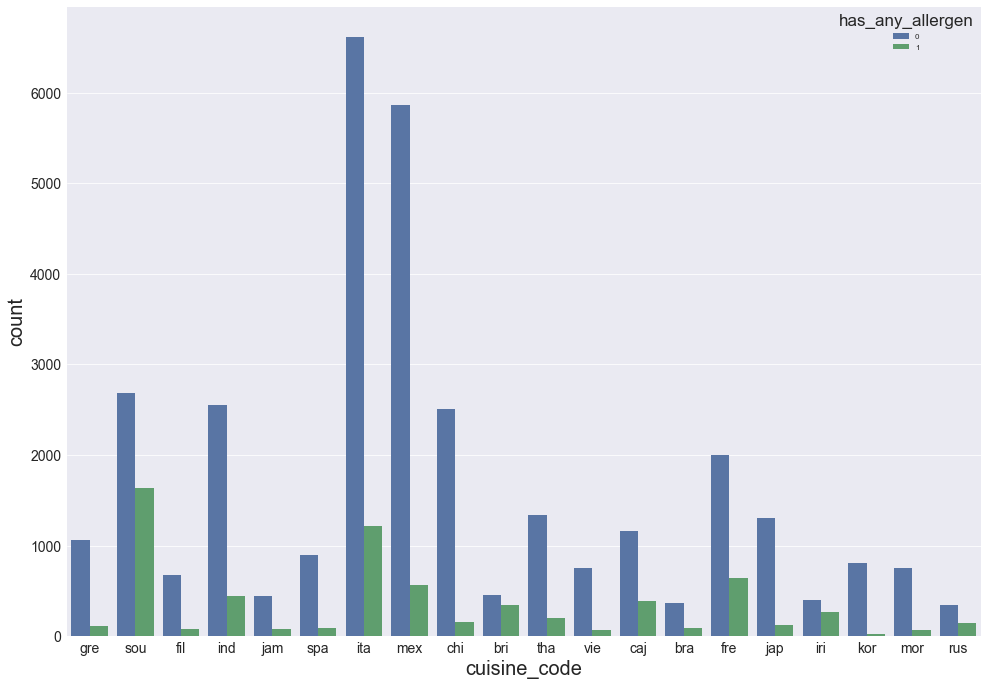

In [25]:
factor = 1.4
a4_dims = (11.7*factor, 8.27*factor)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='cuisine_code', hue='has_any_allergen', data=recipes)
ax.tick_params(labelsize=14)

In [26]:
tmp1 = recipes.groupby('cuisine')['has_most1_allergen'].value_counts()

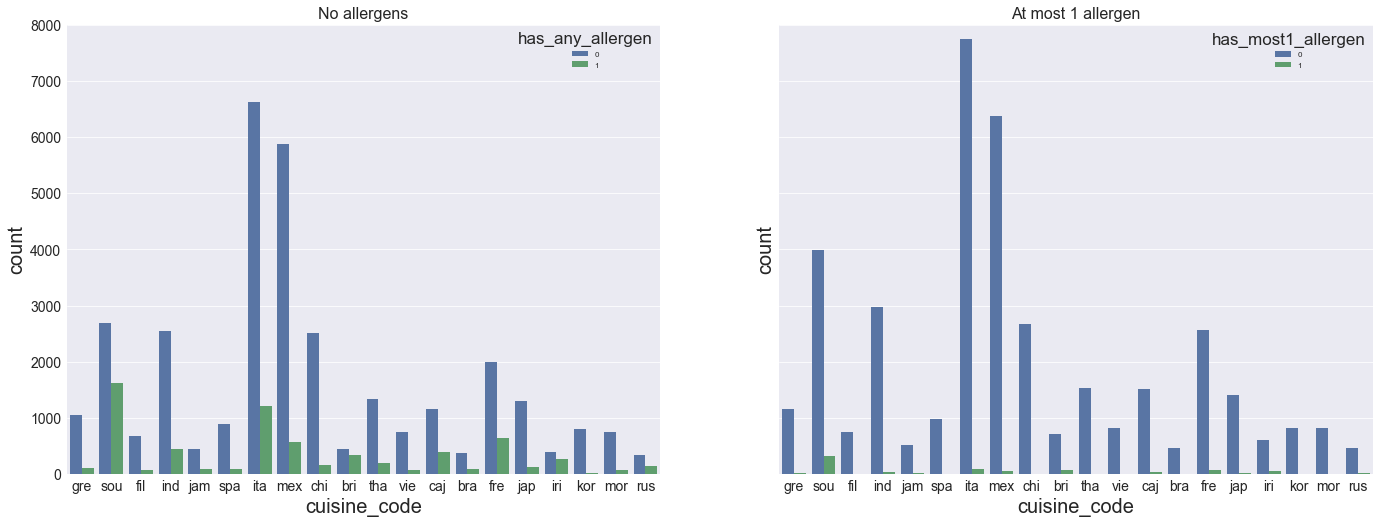

In [27]:
## Figure 1: Towards a personalized allergy index. [LEFT] A count of all recipes in the dataset by country containing 
#            none of the allergens in the personsal allergy profile (blue bars), compared to those which contain 
#            1 or more of the allergens (green bars). 
#            [RIGHT] A count of all recipes in the dataset by country containing 
#            no more than 1 of the allergens in the personsal allergy profile (blue bars), compared to those
#            containing two or more of the allergens in the personsal allergy profile.
#            Relaxing the number of allergens to be considered in the profile by one clearly can bring a lot of 
#            recipes "back on to the table". Looking at, for example, the ratios of such value counts is a crude 
#            first step towards constructing an allergy "index" for a particular cuisine/country.
#            Note: the sum of each pair of blue and green bars will be equal between the two panels.

factor = 2
a4_dims = (11.7*factor, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=a4_dims)
sns.countplot(x='cuisine_code', hue='has_any_allergen', data=recipes, ax=ax1).set_title('No allergens')
sns.countplot(x='cuisine_code', hue='has_most1_allergen', data=recipes, ax=ax2).set_title('At most 1 allergen')
ax2.set_ylim(0,8000)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

#### So by relaxing on 1 allergen ingredient only in a recipe it allows [in this example] for many more recipes to be 'back on the table'.

In [28]:
recipes['n_ingredients'] = recipes.ingredients.apply(lambda ingred : len(ingred))

In [29]:
recipes.head(5)

,cuisine,id,ingredients,has_most1_allergen,has_any_allergen,cuisine_code,n_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",0,0,gre,9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",0,1,sou,11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,1,fil,12
3,indian,22213,"[water, vegetable oil, wheat, salt]",0,0,ind,4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",1,1,ind,20


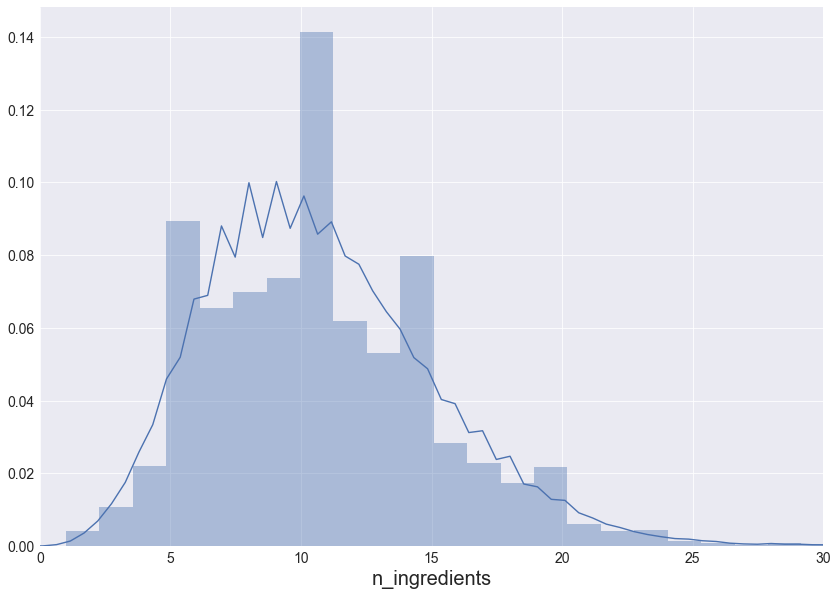

In [30]:
## Figure 2: Examining data quality. This plot shows the distribution of the number of ingredients in each recipe.
#            Note the plot is truncated at 30 ingredients given the long right tail of the distribution.
#            There is some curious step-like structure in the distribution at 5, 10, 15 and 20 ingredients.
#            Perhaps the best recipes are "divisible by 5"! However, the plot demonstrates that there are
#            a number of recipes around (0.5%) that have more than 25 ingredients, with a few (3) having over
#            50 ingredients. Based on my initial research I believe this is a data issue and not some exotic recipe!
#            As with any project, the quality of the outcomes are at best as good as the data inputs.
#            So part of this project will be to work with the data directly via the Yummly API and to create some
#            thorough quality metrics before going too far into more detailed analysis.


factor = 1.2
a4_dims = (11.7*factor, 8.27*factor)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(recipes.n_ingredients)
ax.set_xlim(0,30)
ax.tick_params(labelsize=14)

In [31]:
(recipes.n_ingredients > 25).value_counts() / len(recipes)

False    0.995751
True     0.004249
Name: n_ingredients, dtype: float64

In [32]:
recipes.n_ingredients.max()

65

#### Comment: very long right tail for number of ingredients?! Looks like problem with a few recipes

In [33]:
recipes.n_ingredients.mean()

10.76771257605471

In [34]:
recipes.n_ingredients.median()

10.0

In [35]:
recipes.n_ingredients.std()

4.428977570208113

In [36]:
recipes[recipes.n_ingredients > 50]

,cuisine,id,ingredients,has_most1_allergen,has_any_allergen,cuisine_code,n_ingredients
15289,italian,3885,"[fettucine, fresh marjoram, minced garlic, oli...",1,1,ita,65
26103,mexican,13049,"[vanilla ice cream, lime, garlic powder, zucch...",0,1,mex,52
30350,brazilian,13430,"[marshmallows, fresh corn, cheddar cheese, shr...",1,1,bra,59


In [37]:
for ingredient in recipes[recipes.id == 13430].ingredients:
    print(ingredient)

['marshmallows', 'fresh corn', 'cheddar cheese', 'shredded coconut', 'water', 'honey', 'baking soda', 'dijon mustard', 'sweet potatoes', 'chicken breasts', 'vegetable oil', 'salt', 'condensed milk', 'candy', 'canola oil', 'eggs', 'brown sugar', 'glutinous rice', 'white onion', 'dashi', 'whole wheat flour', 'oat flour', 'flour', 'boneless skinless chicken breasts', 'fresh thyme leaves', 'sprinkles', 'grated lemon zest', 'ham', 'white sugar', 'avocado', 'chili flakes', 'coconut oil', 'skim milk', 'pepper', 'kale', 'parmesan cheese', 'unsalted butter', 'tapioca starch', 'baking powder', 'parsley', 'vanilla extract', 'cream cheese', 'coconut milk', 'chocolate chips', 'low sodium soy sauce', 'powdered sugar', 'sugar', 'muffin', 'milk', 'olive oil', 'bananas', 'large eggs', 'green onions', 'swiss cheese', 'butter', 'all-purpose flour', 'dark brown sugar', 'panko breadcrumbs', 'low-fat milk']


#### Is this really a recipe? 59 ingredients? Maybe some issue in collating the data?

-------

## Initial Yummly API investigation

##### It appears that the unofficial Python Yummly package may have a bug in it (or my installed version) as it cannot be imported (unless it is written in Python 2.x for example) - anyway can investigate this as part of the Fellowship.

In [38]:
# TODO: First need to verify that the Python Yummly API wrapper actually has been tested properly
#
# !pip install yummly

#from yummly import Client
import yummly

ModuleNotFoundError: No module named 'client'

In [ ]:
# default option values
TIMEOUT = 5.0
RETRIES = 0

# Yummly mjboothaus account: Hackathon Plan - Access granted 24 July 2017
API_ID  = 'b4f167ed'
API_KEY = 'f69184af19beb4b76e7b7b1984046581'

client = Client(api_id=API_ID, api_key=API_KEY, timeout=TIMEOUT, retries=RETRIES)

search = client.search('green eggs and ham')
match  = search.matches[0]

matich.id

recipe = client.recipe(match.id)